# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv('Car_Price.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


# Data Cleaning

In [5]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

- As there are no null values we can proceed further

# EDA

In [6]:
df['car_brand'] = df['name'].str.split(' ')

In [7]:
df['car_brand'] = df['car_brand'].apply(lambda x: x[0])

In [8]:
df = df.drop(columns=['name'])

In [9]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_brand'],
      dtype='object')

In [10]:
for i in df.select_dtypes('object').columns:
    print(f"Unique values for column {i} :\nNo of Unique values is {df[i].nunique()}\n{df[i].unique()}\n \n")


Unique values for column fuel :
No of Unique values is 5
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
 

Unique values for column seller_type :
No of Unique values is 3
['Individual' 'Dealer' 'Trustmark Dealer']
 

Unique values for column transmission :
No of Unique values is 2
['Manual' 'Automatic']
 

Unique values for column owner :
No of Unique values is 5
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
 

Unique values for column car_brand :
No of Unique values is 29
['Maruti' 'Hyundai' 'Datsun' 'Honda' 'Tata' 'Chevrolet' 'Toyota' 'Jaguar'
 'Mercedes-Benz' 'Audi' 'Skoda' 'Jeep' 'BMW' 'Mahindra' 'Ford' 'Nissan'
 'Renault' 'Fiat' 'Volkswagen' 'Volvo' 'Mitsubishi' 'Land' 'Daewoo' 'MG'
 'Force' 'Isuzu' 'OpelCorsa' 'Ambassador' 'Kia']
 



In [11]:
df['car_brand'].value_counts()

car_brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [12]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


## Visualize

### Univariate Analysis

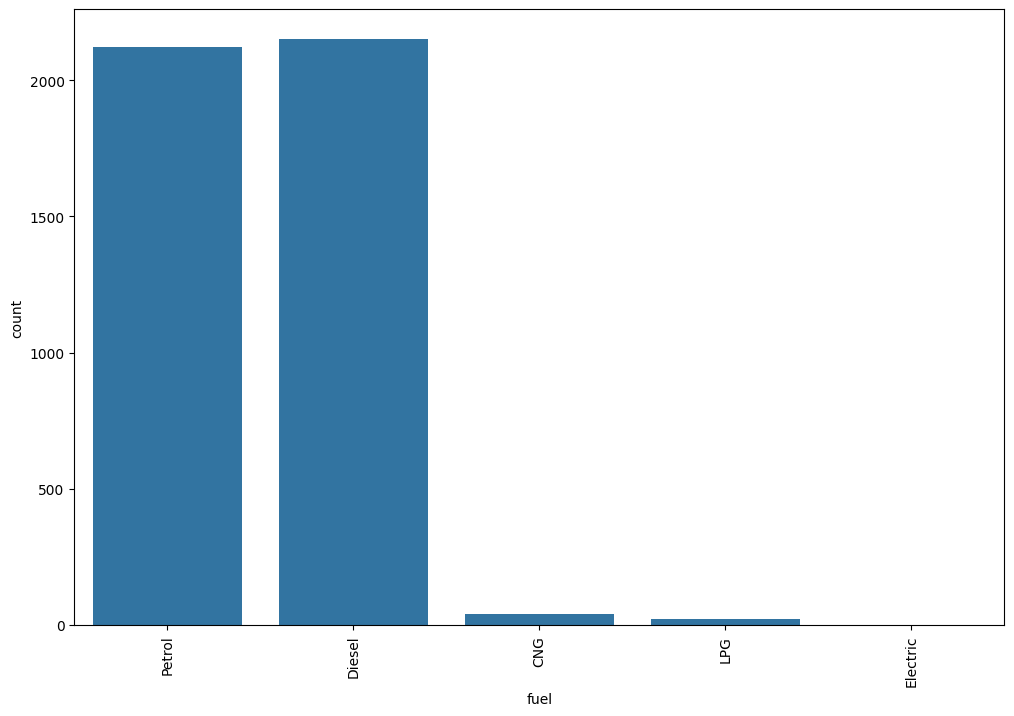

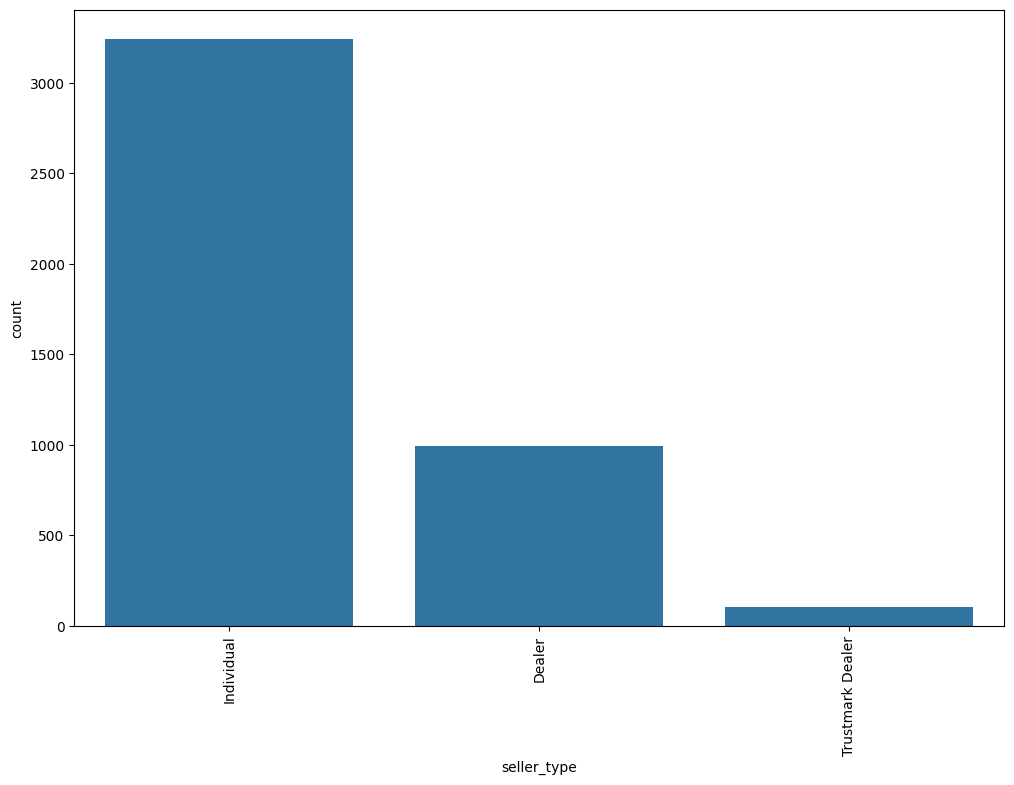

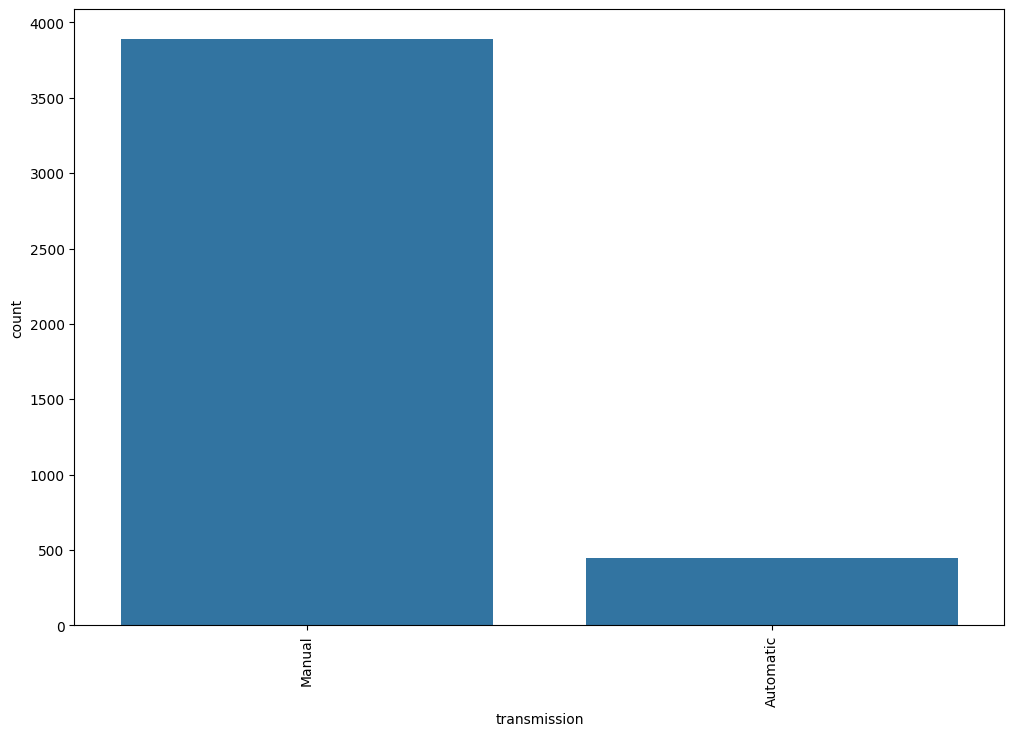

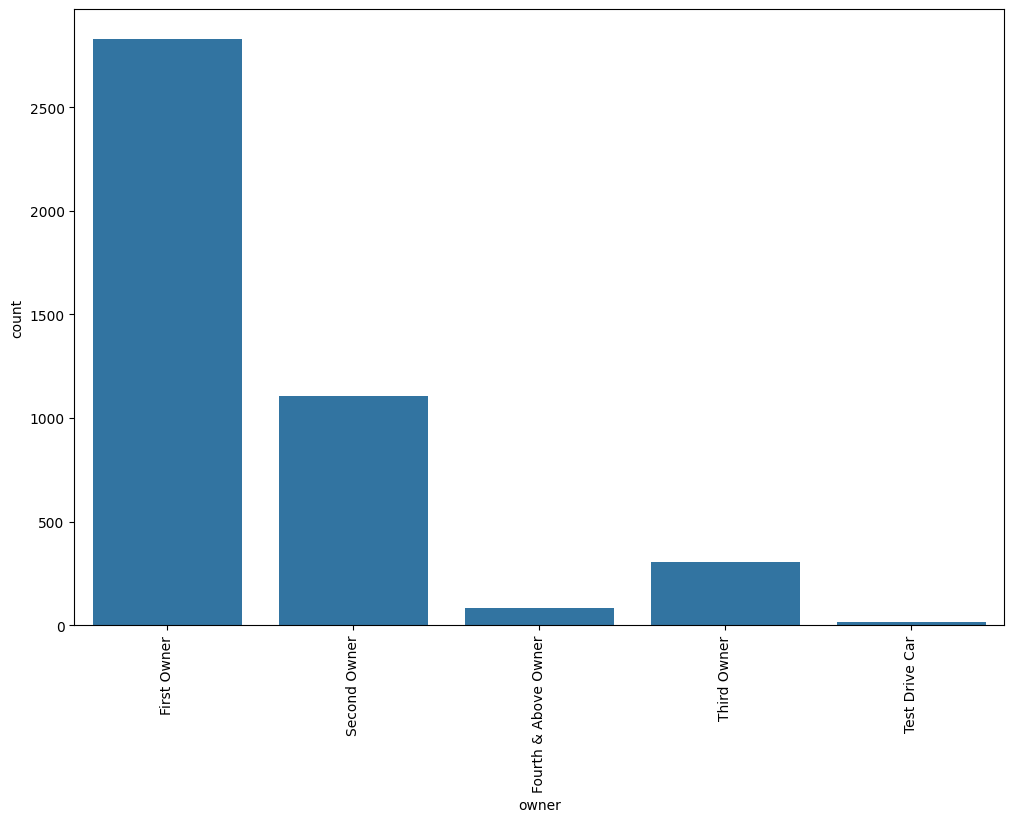

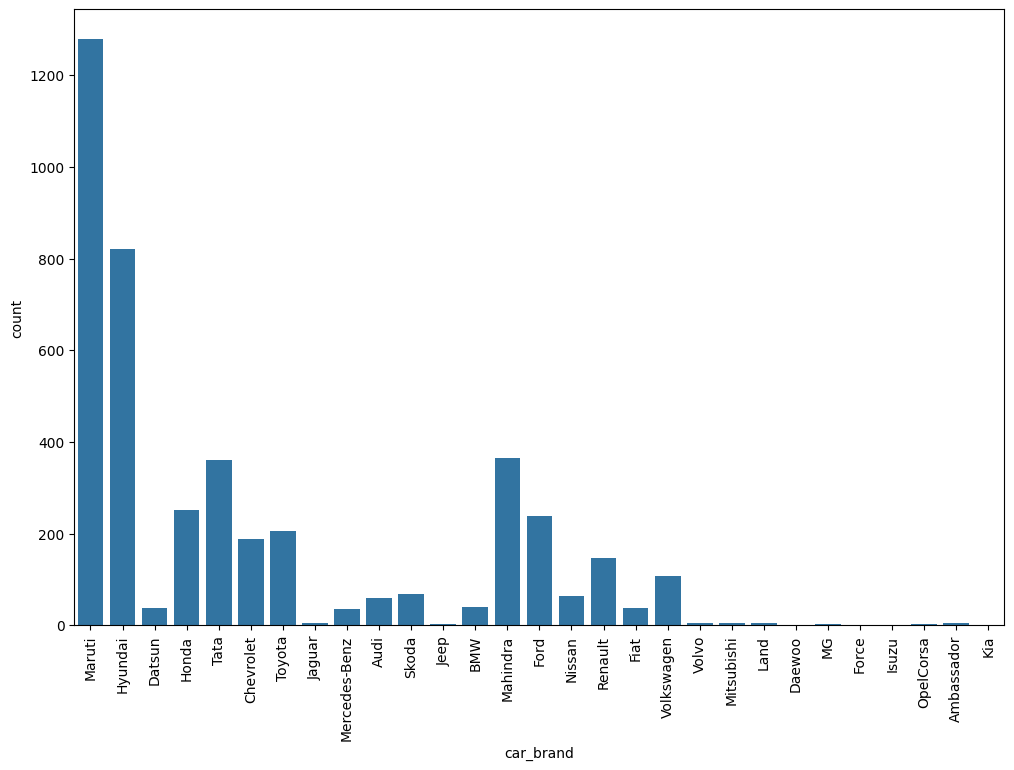

In [13]:
for i in df.select_dtypes('object').columns:
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

#### Observation:
- Major Cars are of Petrol and Diesel
- Most of the Cars are owned by individuals
- Almost all cars are of manual transmission
- Most of the cars are 1st owned.
- The data is dominated by famous brands. Brands like kia, jaguar and Daewoo have very few cars.

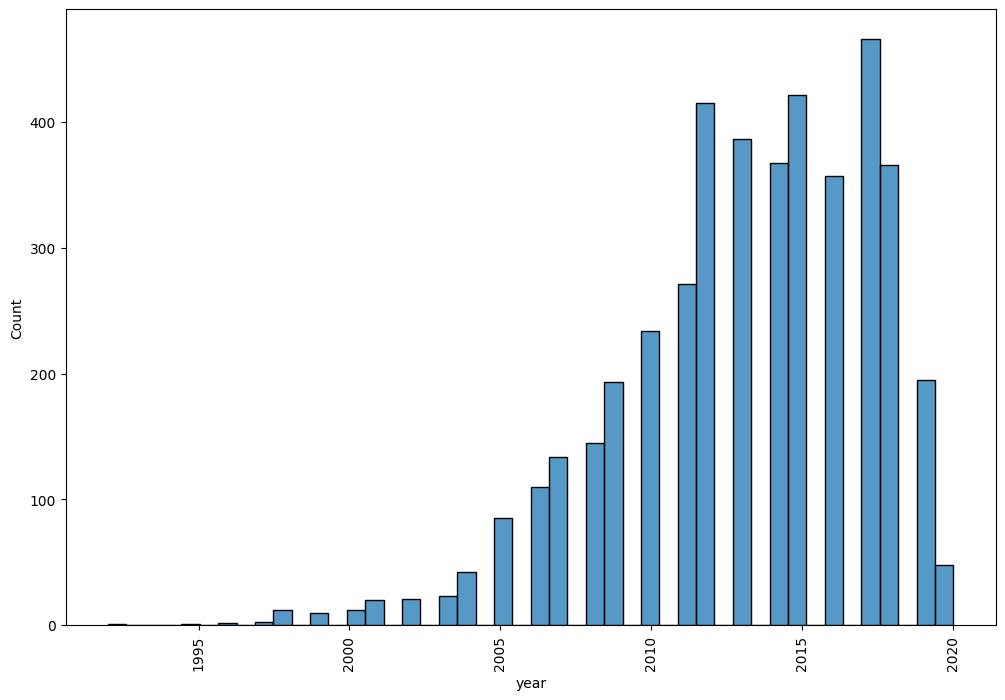

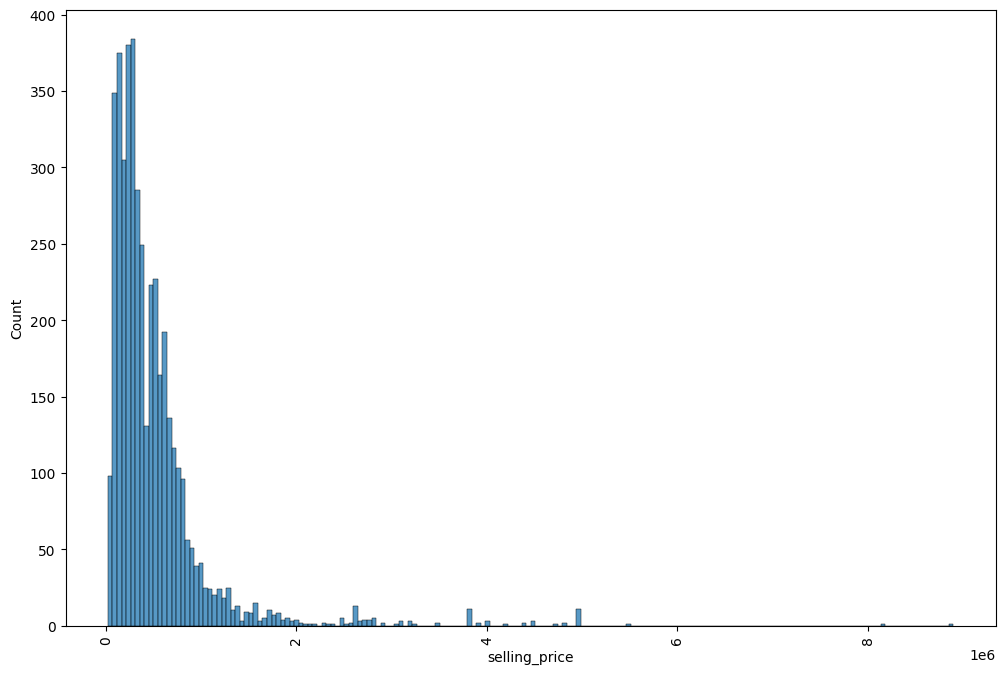

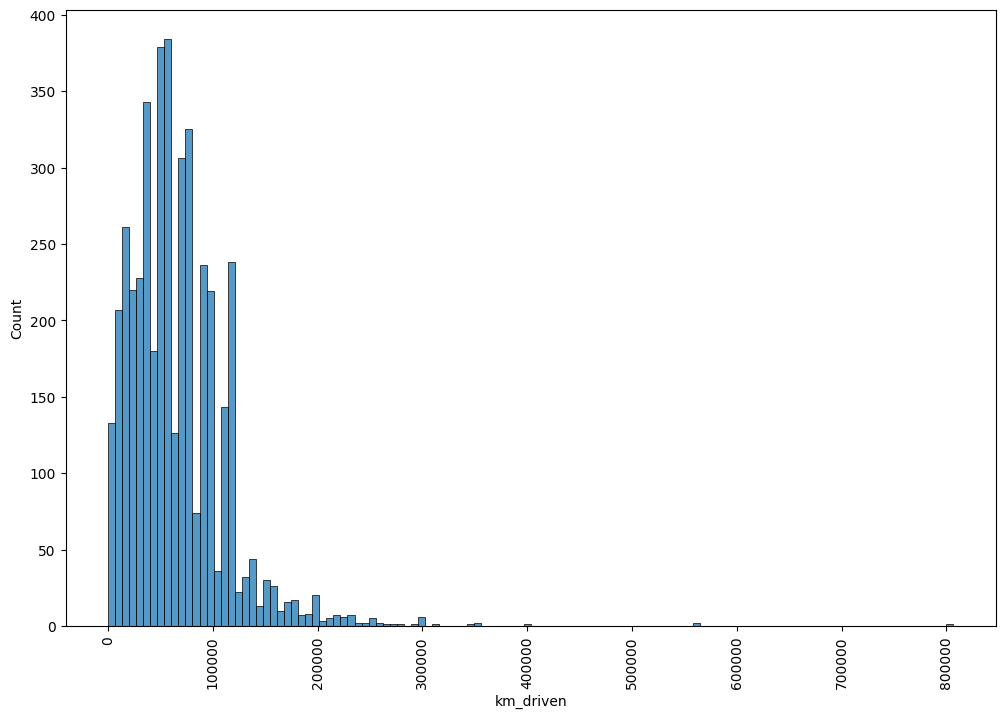

In [14]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

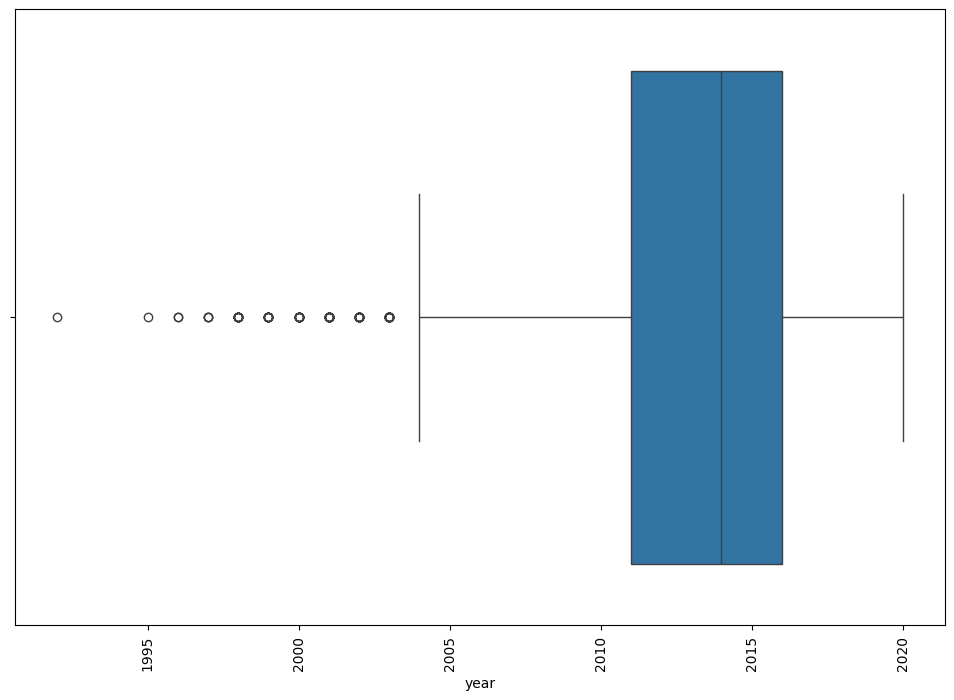

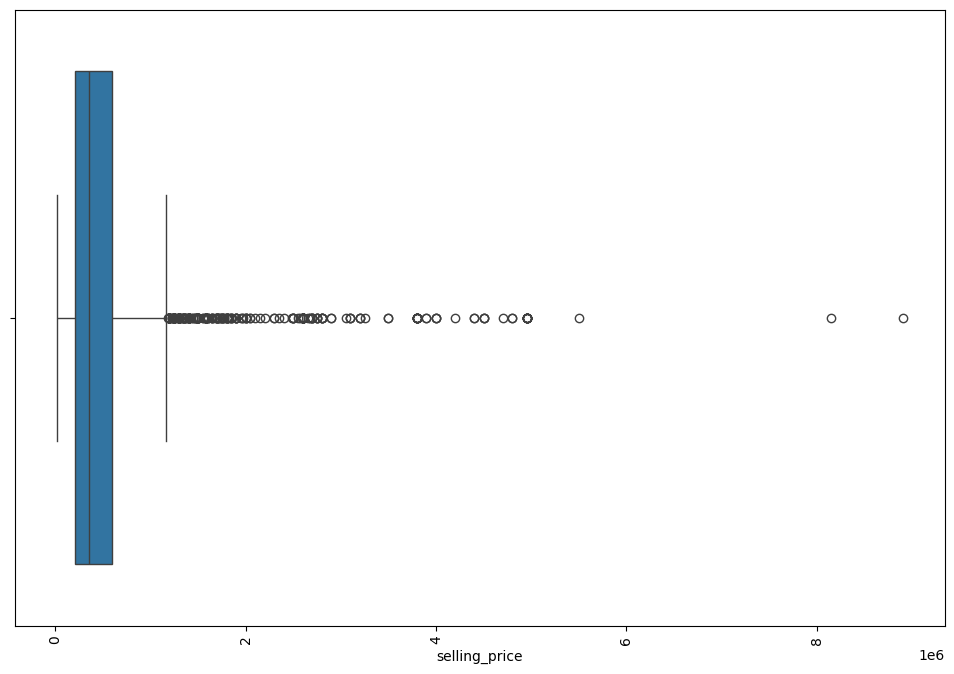

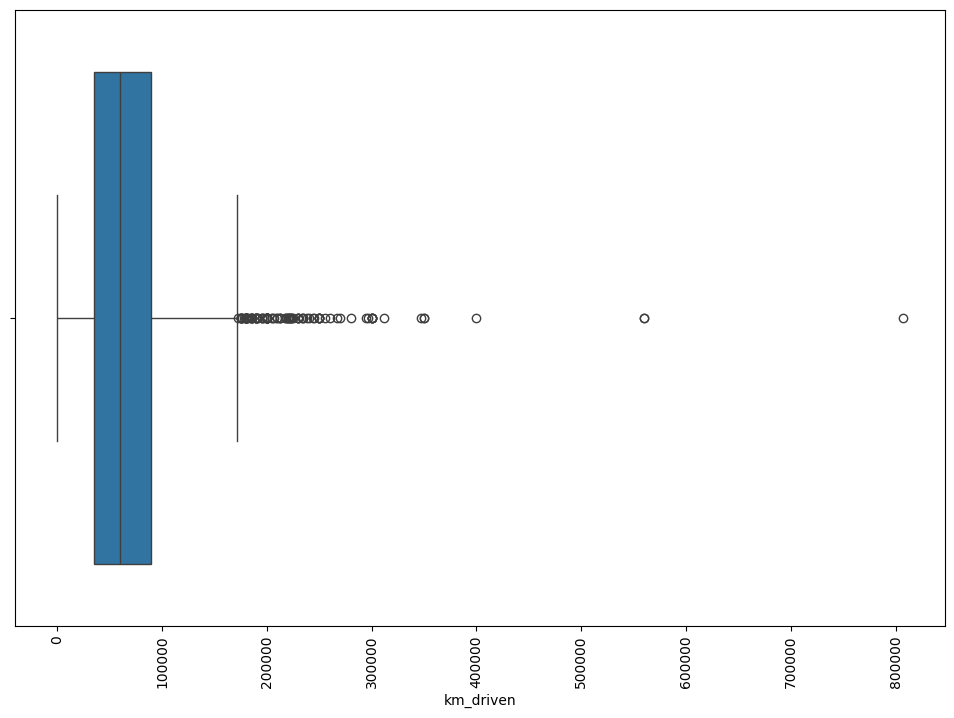

In [15]:
for i in df.select_dtypes('number').columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=i)
    plt.xticks(rotation=90)
    plt.show()

#### Observations
- The Year column is left skewed
- The selling price is right skewed and follows a approximately log normal distribution.
- The kilometer driven is right skewed and follows a approximately log normal distribution.
- The KM driven has many outliers that are have very high values
- The Year purchased has outliers that have very low values

### Bivariate Analysis

In [16]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


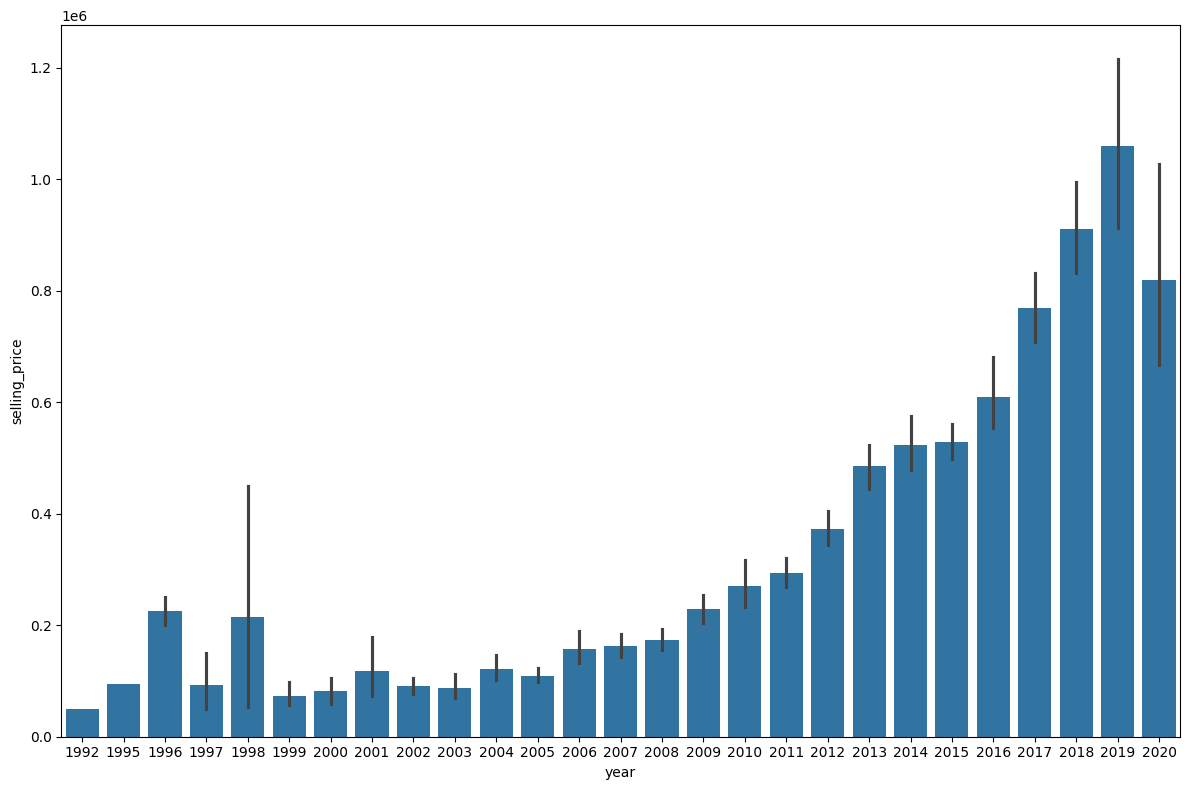

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='year', y = 'selling_price')
plt.tight_layout()
plt.show()

- The Highest sales was recorded in the year 2019
- Lowest sales was recorded in the year 1992
- The sales show a upward trend for sales after year 1999 till year 2019

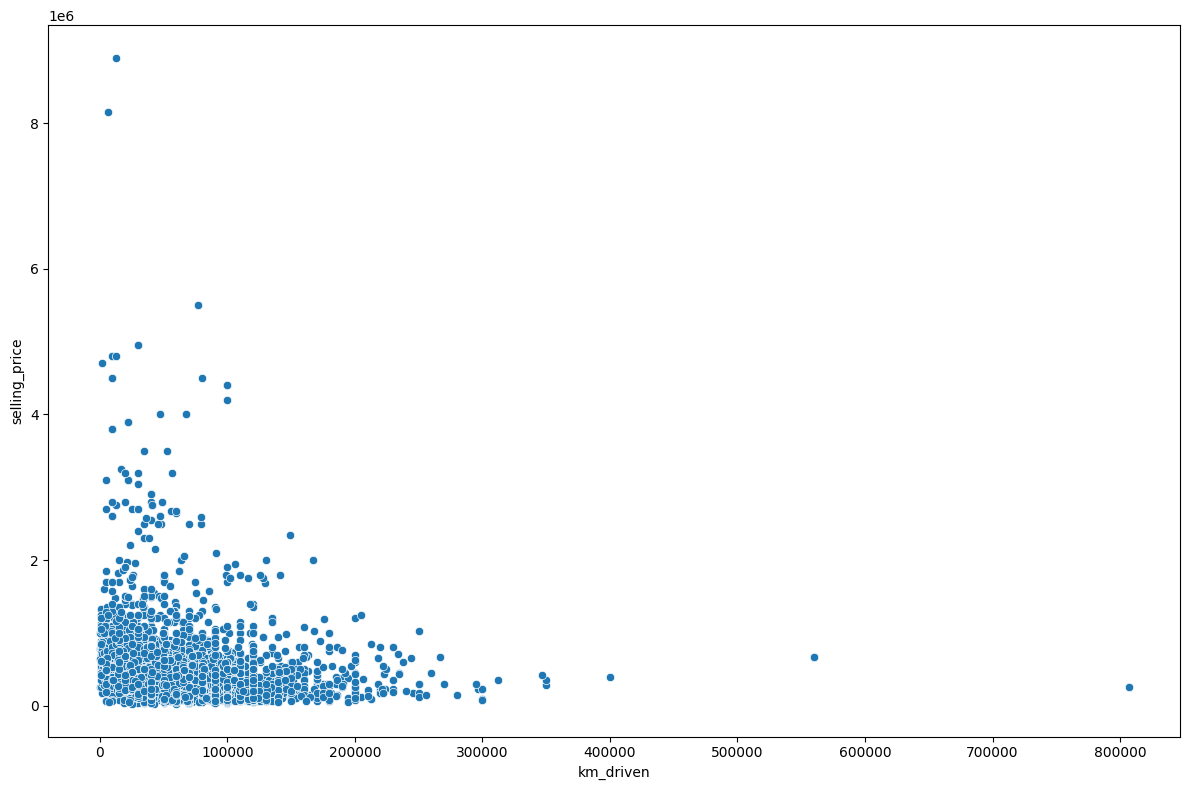

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price')
plt.tight_layout()
plt.show()

- The data is fairly clustered around lower left corner
- There are cars which have very low selling price but have been driven too much
- There are cars with very high selling price but are not driven at all.

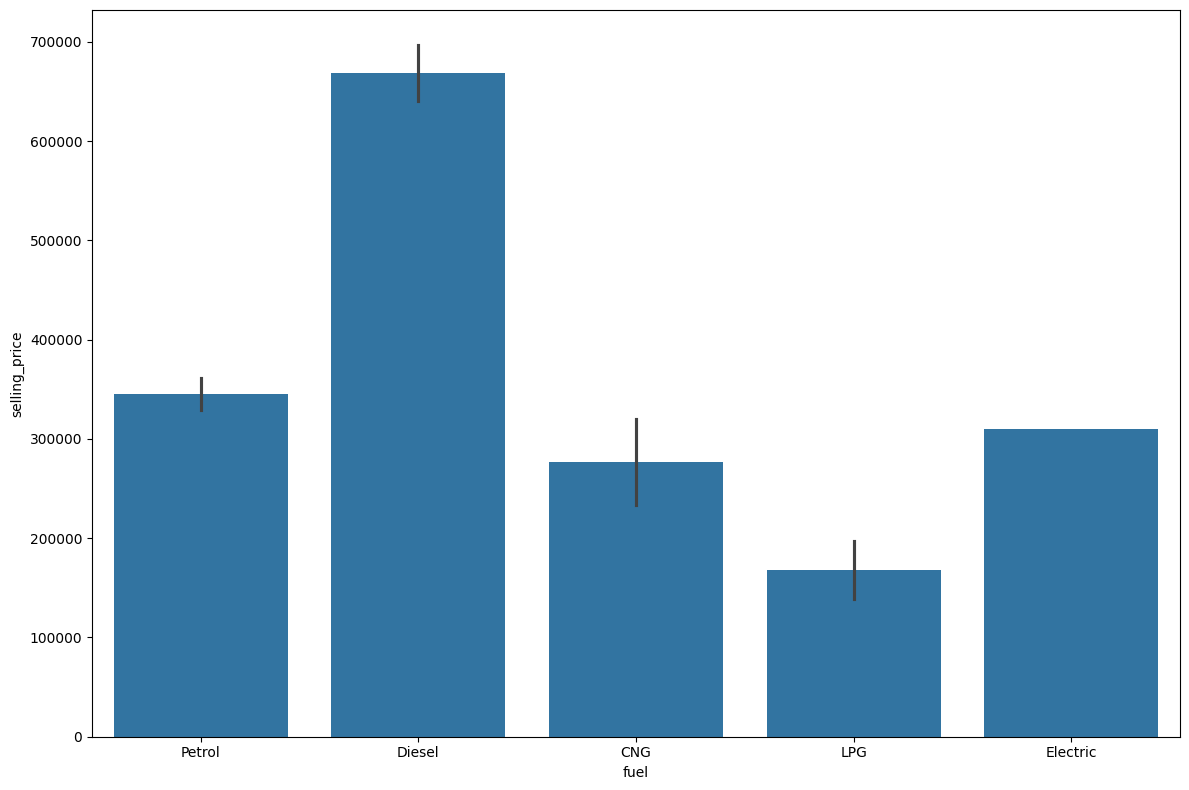

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='fuel', y = 'selling_price')
plt.tight_layout()
plt.show()

- Diesel has the highest selling price.
- Petrol has 2nd highest selling price.
- LPG has lowest price.


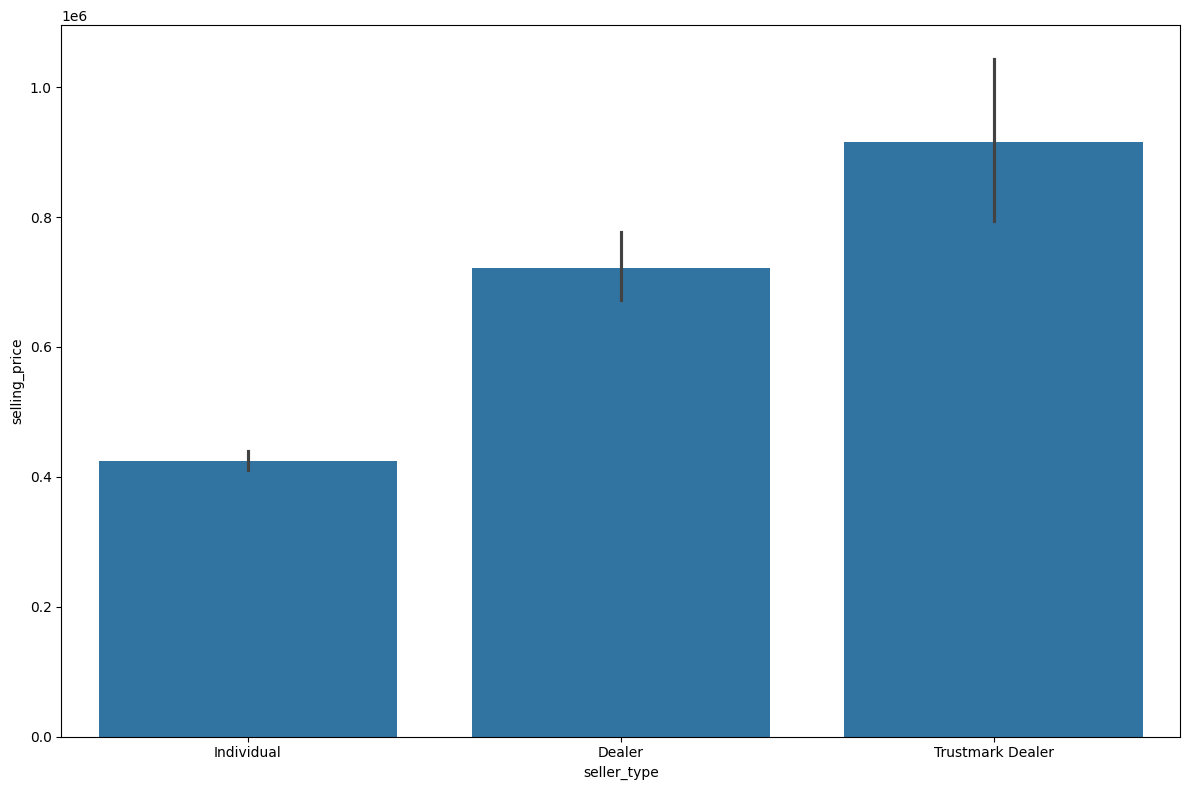

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='seller_type', y = 'selling_price')
plt.tight_layout()
plt.show()

- Trustmark dealers tend to purchase costly cars
- Individual's tend to buy less costly cars

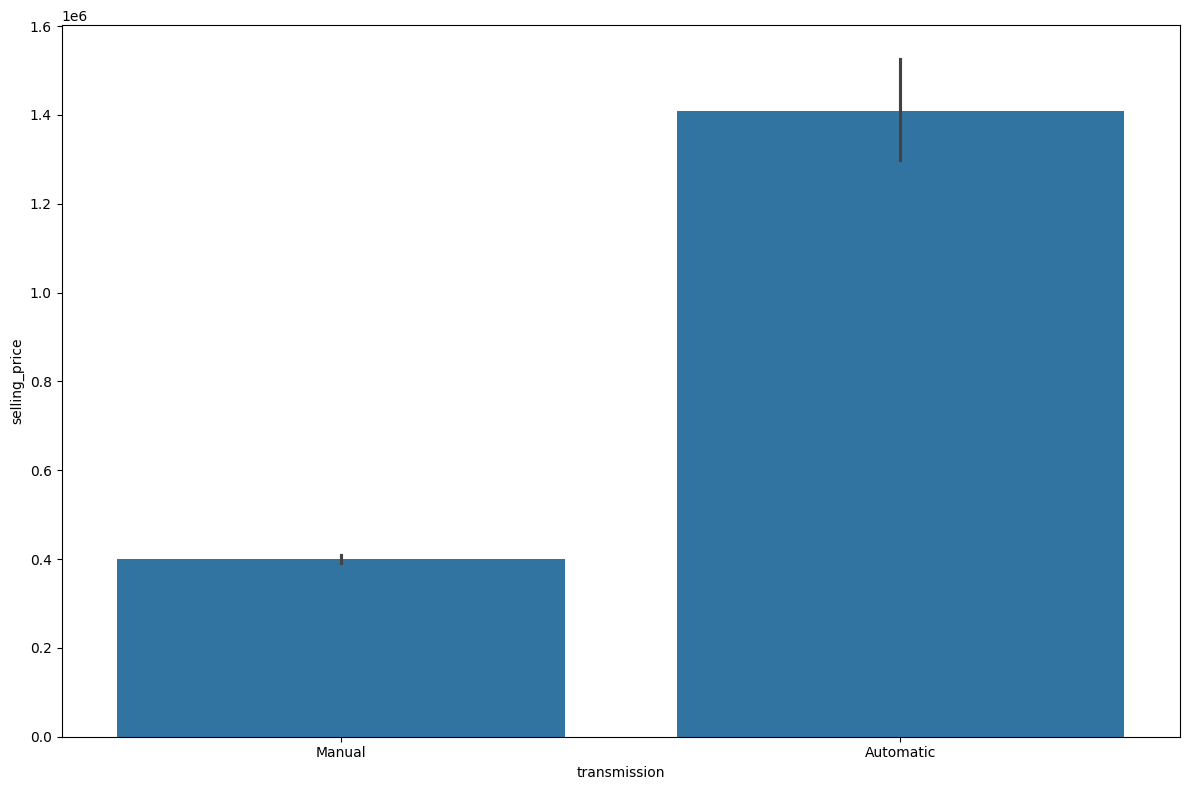

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='transmission', y = 'selling_price')
plt.tight_layout()
plt.show()

In [22]:
df.groupby('transmission')['selling_price'].mean()

transmission
Automatic    1.408154e+06
Manual       4.000667e+05
Name: selling_price, dtype: float64

- The Automatic cars cost almost 4 times the manual

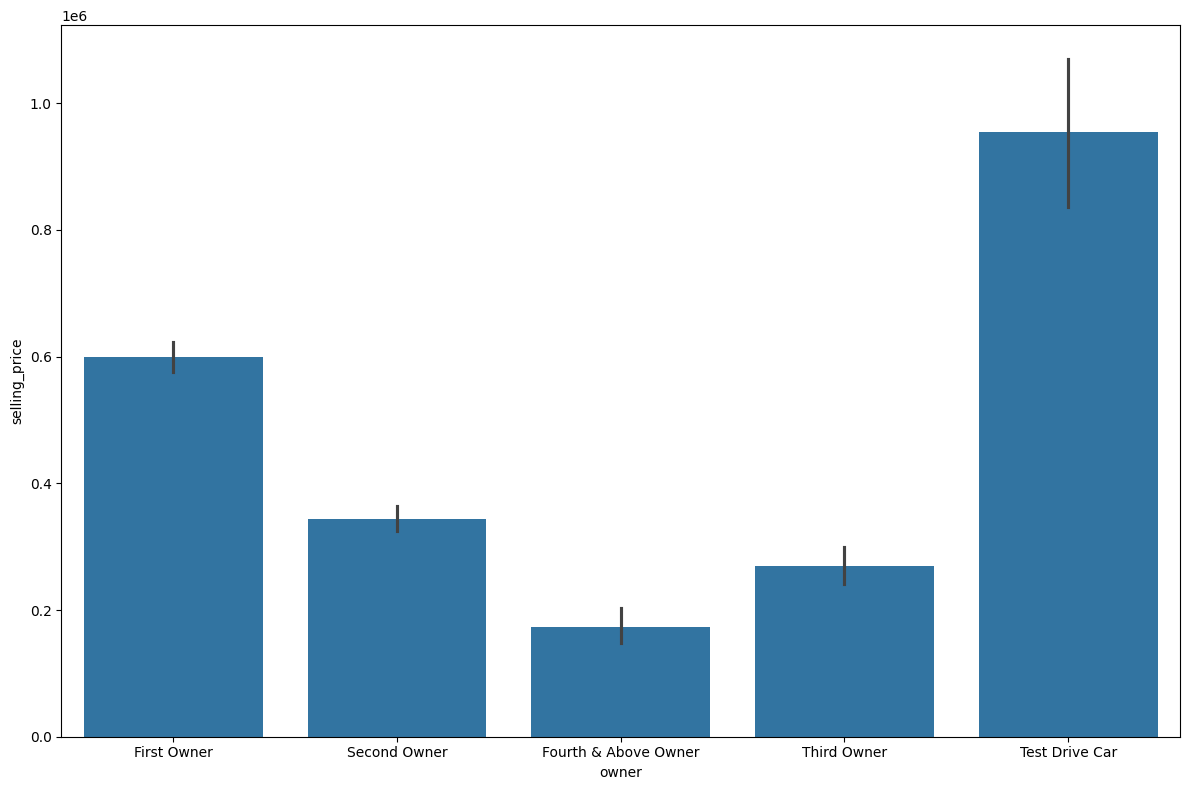

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='owner', y = 'selling_price')
plt.tight_layout()
plt.show()

- The Test drive cars cost the most
- The selling price of decreases as the car goes down to new owners.
- Interestingly The number of test drive cars in dataset is very less as compared to the first owner

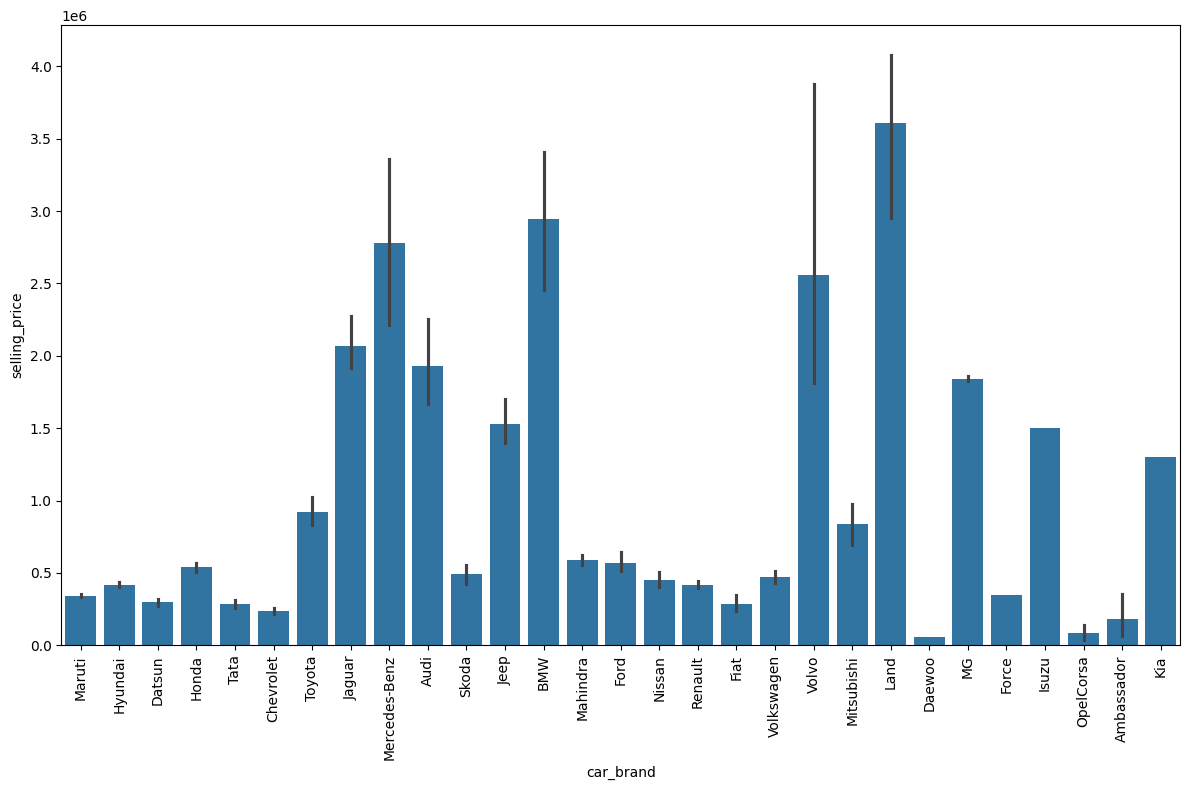

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='car_brand', y = 'selling_price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- The Land brand has the highest selling price
- Daewoo has the lowest selling price
- Famous luxury brands have have higher selling price
- Consumer brands like maruti, hyundai, honda have very low selling price.

### Multivariate Analysis

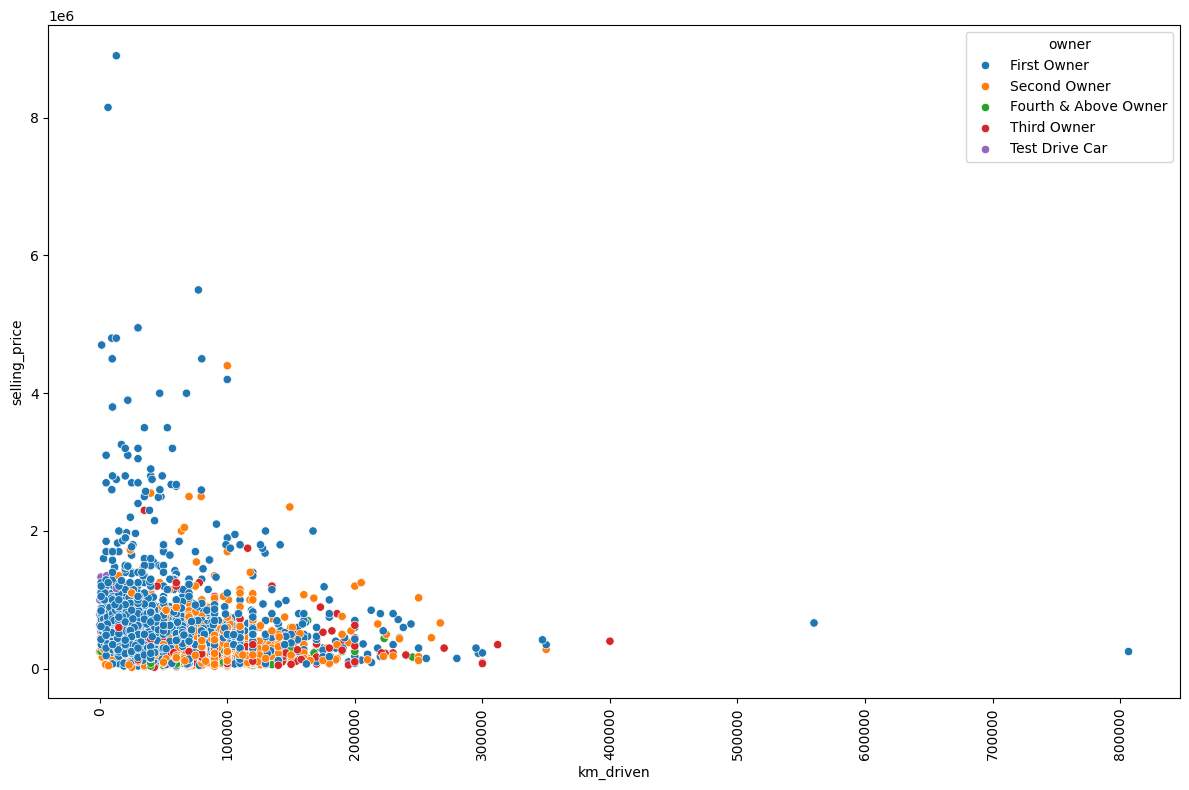

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price', hue='owner')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Second, Third and Fourth owners cars are more driven compared to first owner

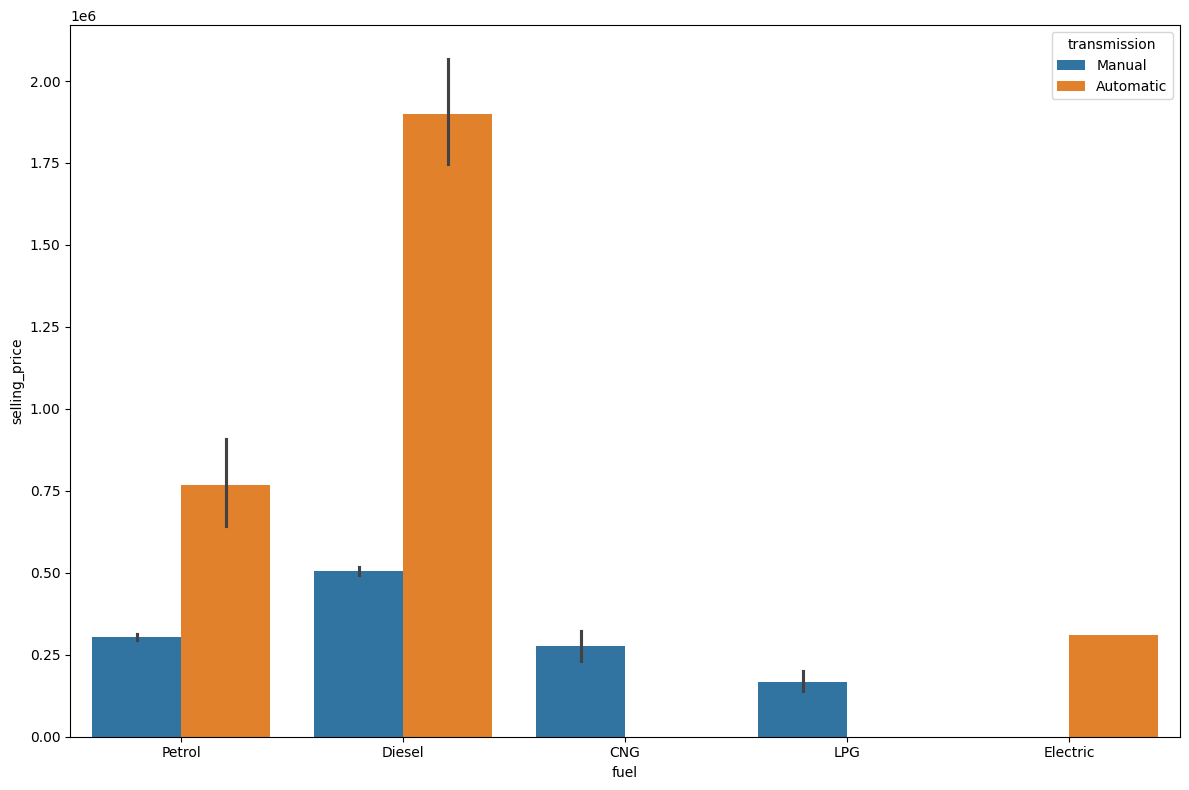

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='fuel', y = 'selling_price', hue='transmission')
plt.tight_layout()
plt.show()

- CNG and LPG do not have Automatic cars
- Automatic Diesel cars are the costliest
- Electric does not have Manual cars

In [27]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


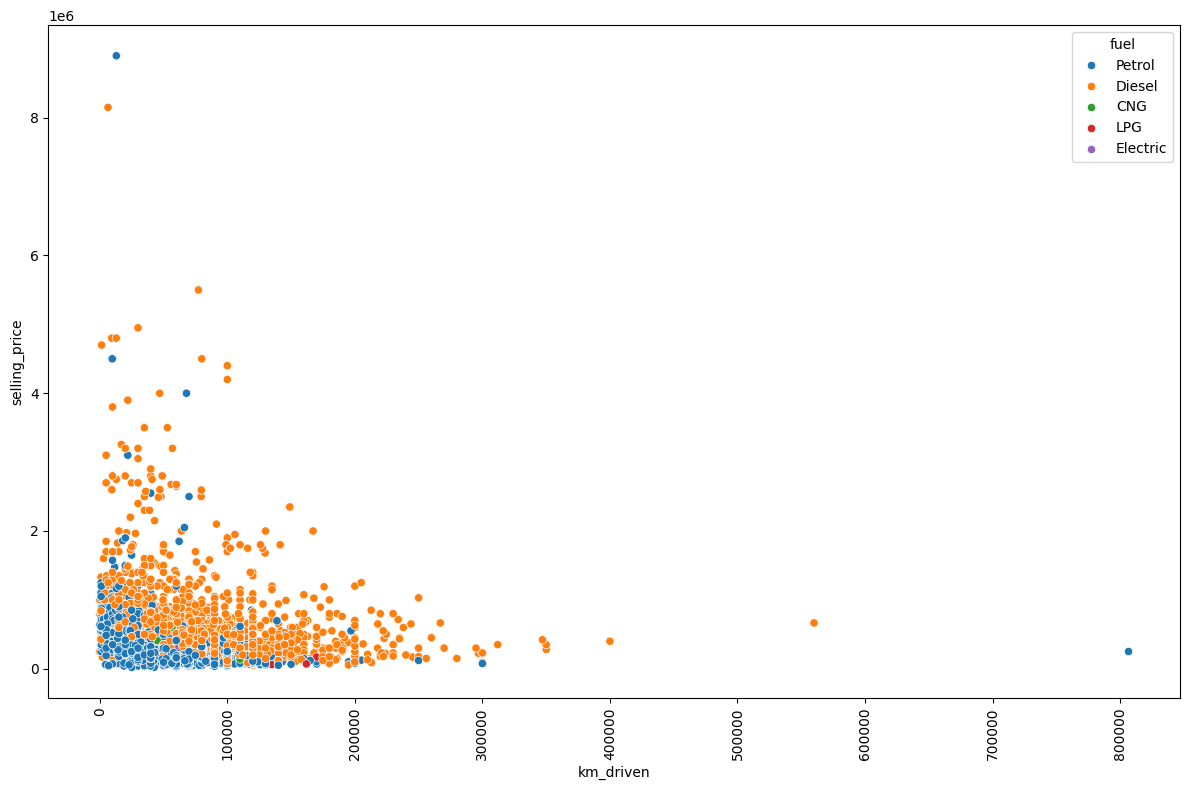

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='km_driven', y = 'selling_price', hue='fuel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Diesel cars with high price are driven very less

### Correlation Analysis

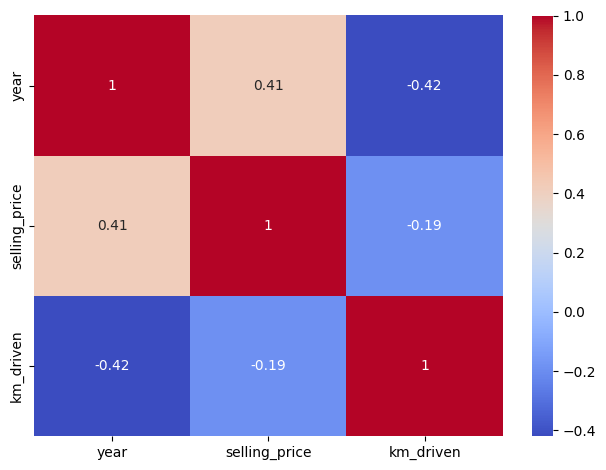

In [29]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

- All numerical values have no or moderate correlation
- We do not need to drop any column which will affect the model for multicollinearility

## Outlier Treatment

- We will not remove the outliers from selling price as it is a target variable

#### Year column

In [30]:
print(df['year'].quantile(0.99))
print(df['year'].quantile(0.01))

2020.0
2001.0


In [31]:
print(f"Mean price of cars older than 2001 : {df[(df['year'] < df['year'].quantile(0.01))]['selling_price'].mean()}")
print(f"Mean price of all cars in dataset: {df['selling_price'].mean()}")

Mean price of cars older than 2001 : 125731.70731707317
Mean price of all cars in dataset: 504127.3117511521


In [32]:
len(df[(df['year'] < df['year'].quantile(0.01)) | (df['year'] > df['year'].quantile(0.99))])

41

- The year column has only around 41 outlier values comparing to the boxplot
- We can easily drop the values

In [33]:
df = df[~((df['year'] < df['year'].quantile(0.01)) | (df['year'] > df['year'].quantile(0.99)))]

#### KM driven column

In [34]:
print(df['km_driven'].quantile(0.98))

186000.0


In [35]:
len(df[df['km_driven'] > df['km_driven'].quantile(0.98)])

85

- The values above around 180000 km are outliers
- There are only about 85 rows with outliers.
- We can eaasily drop these values.

In [36]:
df = df[~(df['km_driven'] > df['km_driven'].quantile(0.98))]

## Distributions and Transformations

#### Distributions

In [37]:
for col in df.select_dtypes('number').columns:
    print(f"Skewness for {col} is: {df[col].skew()}")
    print(f"Kurtosis for {col} is: {df[col].kurt()}")
    print()

Skewness for year is: -0.6319017401397883
Kurtosis for year is: -0.12194258037184413

Skewness for selling_price is: 4.865554189646553
Kurtosis for selling_price is: 36.50068069385787

Skewness for km_driven is: 0.5718941328517453
Kurtosis for km_driven is: -0.07659033978689767



- The year column is:
+ ve skew means left skewed a
+ -ve kurtosis but close to 0 means right peaked
- The km_driven column is 
+ +ve skew means right skewed 
+ -ve kurtosis but close to 0 means right peaked
- The selling price has a 
+ +ve skew means right skewed 
+ very high +vs kutosis means it is very peaked curve

#### Transformations

- We transform the km_driven column by taking its sqrt to make is almost normally distributed

In [38]:
df['km_driven'] = np.sqrt(df['km_driven'])

<Axes: >

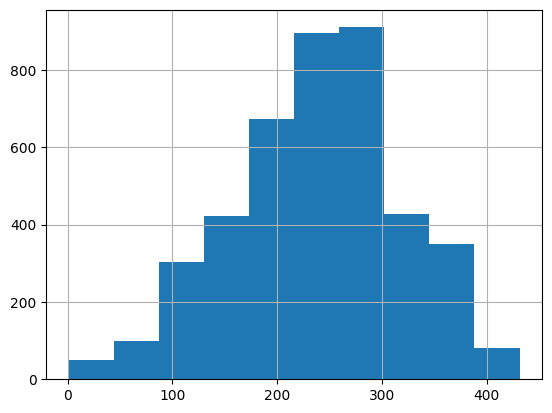

In [39]:
df['km_driven'].hist()

- We transform the selling_price column to log cause it has very right skewed values

<Axes: >

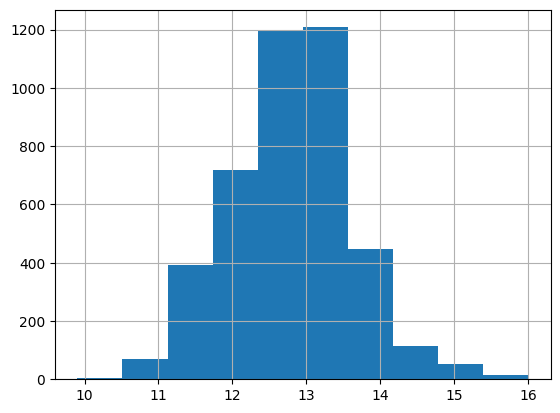

In [40]:
df['selling_price']  = np.log(df['selling_price'])
df['selling_price'].hist()

## Feature Engineering

In [41]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,11.002100,264.575131,Petrol,Individual,Manual,First Owner,Maruti
1,2007,11.813030,223.606798,Petrol,Individual,Manual,First Owner,Maruti
2,2012,13.304685,316.227766,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,12.429216,214.476106,Petrol,Individual,Manual,First Owner,Datsun
4,2014,13.017003,375.499667,Diesel,Individual,Manual,Second Owner,Honda


In [42]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['fuel', 'seller_type', 'transmission', 'owner', 'car_brand'], dtype='object')

In [43]:
df_encoded = pd.get_dummies(df, columns=cat_cols)

In [44]:
df_encoded

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,2007,11.002100,264.575131,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2007,11.813030,223.606798,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2012,13.304685,316.227766,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2017,12.429216,214.476106,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2014,13.017003,375.499667,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,12.923910,282.842712,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4336,2014,12.923910,282.842712,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4337,2009,11.608236,288.097206,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4338,2016,13.670485,300.000000,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Splitting Data into train and test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df_encoded.drop(columns=['selling_price'])
y = df_encoded['selling_price']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [48]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(3371, 46) (843, 46)
(3371,) (843,)


## Training a Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

In [50]:
def model_scoring(y_pred, y_test):
    print(f"Mean Absolute Error : {mean_absolute_error(y_pred, y_test)}")
    print(f"Mean Squared Error : {mean_squared_error(y_pred, y_test)}")
    print(f"Root Mean Squared Error : {root_mean_squared_error(y_pred, y_test)}")
    residuals = y_pred - y_test
    residuals = np.abs(residuals)    
    print(f"The difference in prediction and actual values is : {np.sum(residuals)}")
    print(f"R2 Score : {round(r2_score(y_pred, y_test)*100,4)} %")

In [51]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)

In [53]:
model_scoring(y_pred, y_test)

Mean Absolute Error : 0.2777944167822644
Mean Squared Error : 0.12704921663604826
Root Mean Squared Error : 0.3564396395409022
The difference in prediction and actual values is : 234.18069334744888
R2 Score : 76.8788 %


## Feature Scaling

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [55]:
scaler_x = StandardScaler()
x_train_scaled = pd.DataFrame(scaler_x.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler_x.transform(x_test), columns=x_test.columns)

In [56]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1))

In [57]:
x_train_scaled.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,0.668397,-1.183099,-0.10094,1.017658,-0.017226,-0.066855,-0.987911,-0.552790,0.588427,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
1,-0.589512,0.429540,-0.10094,1.017658,-0.017226,-0.066855,-0.987911,1.809004,-1.699447,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,7.989175,-0.300388,-0.218048,-0.167503,-0.034467
2,-1.092676,1.384183,-0.10094,-0.982648,-0.017226,-0.066855,1.012237,-0.552790,0.588427,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
3,-0.337930,-0.153808,-0.10094,-0.982648,-0.017226,-0.066855,1.012237,-0.552790,0.588427,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
4,1.171561,-0.749182,-0.10094,-0.982648,-0.017226,-0.066855,1.012237,1.809004,-1.699447,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467


In [58]:
x_train_scaled.shape

(3371, 46)

In [59]:
x_test_scaled.head()

,year,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,...,car_brand_Mercedes-Benz,car_brand_Mitsubishi,car_brand_Nissan,car_brand_OpelCorsa,car_brand_Renault,car_brand_Skoda,car_brand_Tata,car_brand_Toyota,car_brand_Volkswagen,car_brand_Volvo
0,-0.086348,0.802942,-0.10094,1.017658,-0.017226,-0.066855,-0.987911,-0.552790,0.588427,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
1,0.668397,0.230681,-0.10094,1.017658,-0.017226,-0.066855,-0.987911,-0.552790,-1.699447,6.497534,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
2,1.171561,-0.918195,-0.10094,1.017658,-0.017226,-0.066855,-0.987911,1.809004,-1.699447,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
3,0.165233,0.632069,-0.10094,1.017658,-0.017226,-0.066855,-0.987911,-0.552790,0.588427,-0.153905,...,-0.088163,-0.038541,8.068336,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467
4,-0.841094,0.588064,9.90692,-0.982648,-0.017226,-0.066855,-0.987911,-0.552790,0.588427,-0.153905,...,-0.088163,-0.038541,-0.123941,-0.024365,-0.188779,-0.125169,-0.300388,-0.218048,-0.167503,-0.034467


In [60]:
x_test_scaled.shape

(843, 46)

## Prediction Using Models

#### With Scaling

In [61]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train_scaled)
y_pred = lr.predict(x_test_scaled)
model_scoring(y_pred, y_test_scaled)

Mean Absolute Error : 0.33398730749986744
Mean Squared Error : 0.1839909623324118
Root Mean Squared Error : 0.42894167707558073
The difference in prediction and actual values is : 281.55130022238825
R2 Score : 77.1626 %


#### Without Scaling

In [62]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
model_scoring(y_pred, y_test)

Mean Absolute Error : 0.2777944167822644
Mean Squared Error : 0.12704921663604826
Root Mean Squared Error : 0.3564396395409022
The difference in prediction and actual values is : 234.18069334744888
R2 Score : 76.8788 %


- The score of 73.3351% will act as a baseline score for all models

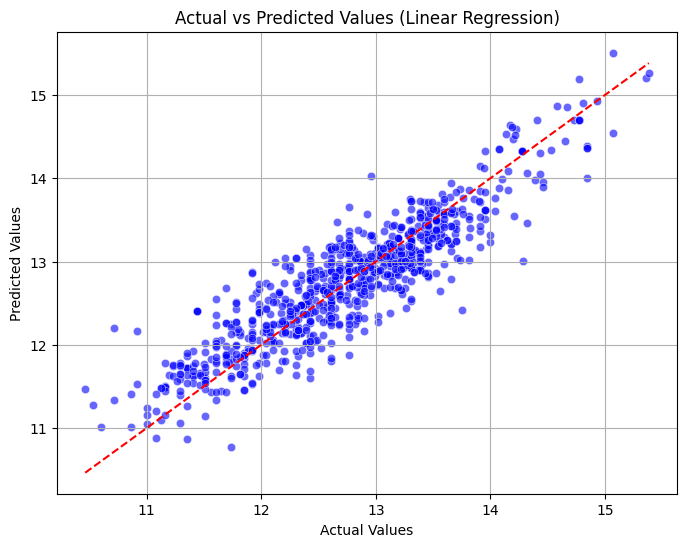

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()

- There is a +ve correlation between pred and actual

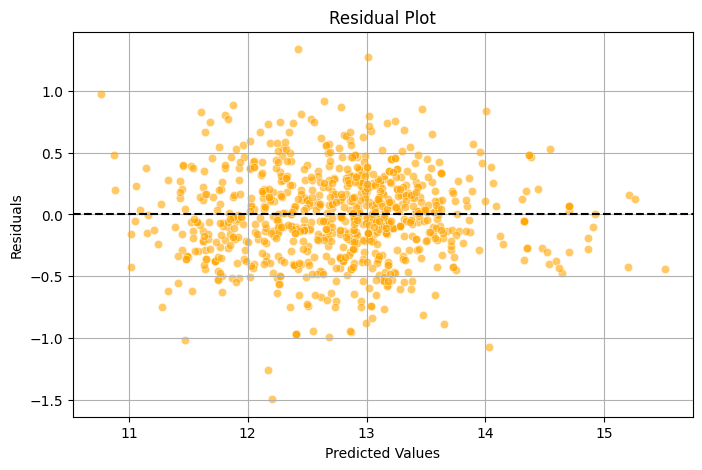

In [64]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='orange', alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

<Axes: >

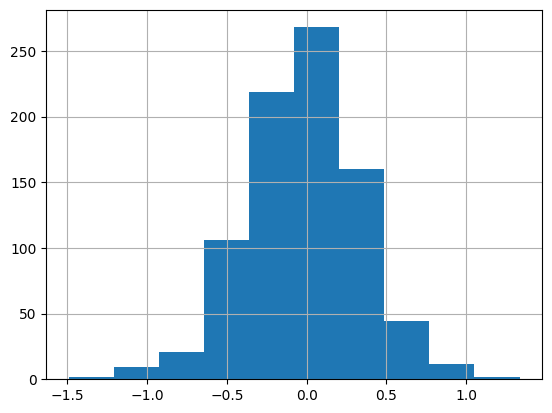

In [65]:
residuals.hist()

- The residuals are also normally distributed which is a very nice thing

## Other Models

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#### DecisionTreeRegressor 

In [ ]:
dtr_params_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best'],                           
    'max_depth': [5, 10, 15, 20, 25, None],         
    'min_samples_split': [2, 5, 10, 20],            
    'min_samples_leaf': [1, 2, 4, 8],               
    'max_features': [None, 'sqrt', 'log2'],        
    'max_leaf_nodes': [None, 50, 100, 200],        
    'ccp_alpha': [0.0, 0.001, 0.01, 0.05],         
}

reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=reg,
    param_grid=dtr_params_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAE):", grid_search.best_score_)

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits


In [60]:
dtr = DecisionTreeRegressor(**grid_search.best_params_)
dtr.fit(x_train, y_train)

print("Training Scores:")
model_scoring(dtr.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(dtr.predict(x_test), y_test)

Training Scores:
Mean Absolute Error : 0.18832310090694554
Mean Squared Error : 0.06847470980572402
Root Mean Squared Error : 0.2616767276731426
The difference in prediction and actual values is : 634.8371731573134
R2 Score : 89.1394 %

Testing Scores:
Mean Absolute Error : 0.29313786481586057
Mean Squared Error : 0.16286775247652216
Root Mean Squared Error : 0.40356877044256306
The difference in prediction and actual values is : 247.11522003977046
R2 Score : 71.2094 %


#### RandomForestRegressor

In [109]:
rf_params_grid = {
    'n_estimators': [100, 200, 300, 500],  
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4, 6],       
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],             
    'oob_score': [True, False],             
    'warm_start': [True, False]                        
}

reg = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=reg,
    param_grid=rf_params_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAE):", grid_search.best_score_)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


c:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5760 fits failed out of a total of 23040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5760 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users

Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'oob_score': False, 'warm_start': True}
Best Score (Negative MAE): -0.26994523615758526


In [110]:
rf = RandomForestRegressor(**grid_search.best_params_)
rf.fit(x_train, y_train)

print("Training Scores:")
model_scoring(rf.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(rf.predict(x_test), y_test)

Training Scores:
Mean Absolute Error : 0.08493078170606667
Mean Squared Error : 0.020579143645620992
Root Mean Squared Error : 0.14345432599130983
The difference in prediction and actual values is : 286.30166513115074
R2 Score : 96.8478 %

Testing Scores:
Mean Absolute Error : 0.244802320271879
Mean Squared Error : 0.1189998689251037
Root Mean Squared Error : 0.34496357622958357
The difference in prediction and actual values is : 206.36835598919401
R2 Score : 76.6598 %


#### GradientBoostingRegressor

In [111]:
gb_params_grid = {
    'n_estimators': [100, 200, 300, 500],              
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],     
    'max_depth': [3, 5, 7, 10],                         
    'min_samples_split': [2, 5, 10],                     
    'min_samples_leaf': [1, 2, 4],                       
    'subsample': [0.7, 0.8, 0.9, 1.0],                  
    'max_features': [ 'sqrt', 'log2'],           
    'warm_start': [True, False],                         
    'loss': ['squared_error', 'absolute_error', 'huber']                             
}

reg = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=reg,
    param_grid=gb_params_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAE):", grid_search.best_score_)

Fitting 5 folds for each of 34560 candidates, totalling 172800 fits


KeyboardInterrupt: 

In [ ]:
gb = GradientBoostingRegressor(**grid_search.best_params_)
gb.fit(x_train, y_train)

print("Training Scores:")
model_scoring(gb.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(gb.predict(x_test), y_test)

#### XGBoost

In [ ]:
gb_params_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300],
    'subsample': [0.6, 0.8, 1.0]
}

model = XGBRegressor(
    tree_method='gpu_hist',   
    predictor='gpu_predictor',
    gpu_id=0,                 
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8
)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=gb_params_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAE):", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
xgbr = XGBRegressor(**grid_search.best_params_)
xgbr.fit(x_train, y_train)

print("Training Scores:")
model_scoring(xgbr.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(xgbr.predict(x_test), y_test)

#### LightGBM

In [ ]:
gb_params_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300],
    'subsample': [0.6, 0.8, 1.0]
}

model = LGBMRegressor(device='gpu')

grid_search = GridSearchCV(
    estimator=model,
    param_grid=gb_params_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAE):", grid_search.best_score_)

In [ ]:
lgbmr = LGBMRegressor(**grid_search.best_params_)
lgbmr.fit(x_train, y_train)

print("Training Scores:")
model_scoring(lgbmr.predict(x_train), y_train)

print("\nTesting Scores:")
model_scoring(lgbmr.predict(x_test), y_test)